In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

In [2]:
data = pd.read_csv('Columbia STS-1 RS-25_log.csv')

data['Time'] = data['Time'] - data['Time'][0]

data.head()

,Time,Lat,Lng,Altitude,Dwnrg Dst,Stage,Mass,TWR,Throt,AZ(cmd),HAOA,Pitch,VAOA,Surfvel,Orbvel,Vspeed,Dwnrg surfvel,Incl,Ecctr,Unnamed: 19
0,0.00,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,0.92,28.608372,-80.604170,0.057576,0.000457,1,873064.502681,1.237133,100.0,0.238215,-0.087974,83.231007,6.612467,4.622669,407.899538,4.591913,0.531575,28.608462,0.997341,NaN
2,1.88,28.608379,-80.604170,0.064186,0.001215,1,873064.502681,1.238743,100.0,0.884428,-0.067971,83.473249,6.480780,9.500926,407.987007,9.440276,1.071497,28.608749,0.997341,NaN
3,2.84,28.608391,-80.604170,0.075472,0.002491,1,873064.502681,1.242990,100.0,0.386280,-0.041321,83.564358,6.392290,14.427657,408.135033,14.337783,1.607753,28.609218,0.997341,NaN
4,3.80,28.608407,-80.604169,0.091516,0.004281,1,873064.502681,1.252187,100.0,0.745039,-0.091934,83.637194,6.291754,19.496610,408.372297,19.378640,2.141521,28.609869,0.997340,NaN


In [3]:
data.dtypes

Time             float64
Lat              float64
Lng              float64
Altitude         float64
Dwnrg Dst        float64
Stage              int64
Mass             float64
TWR              float64
Throt            float64
AZ(cmd)          float64
HAOA             float64
Pitch            float64
VAOA             float64
Surfvel          float64
Orbvel           float64
Vspeed           float64
Dwnrg surfvel    float64
Incl             float64
Ecctr            float64
Unnamed: 19      float64
dtype: object

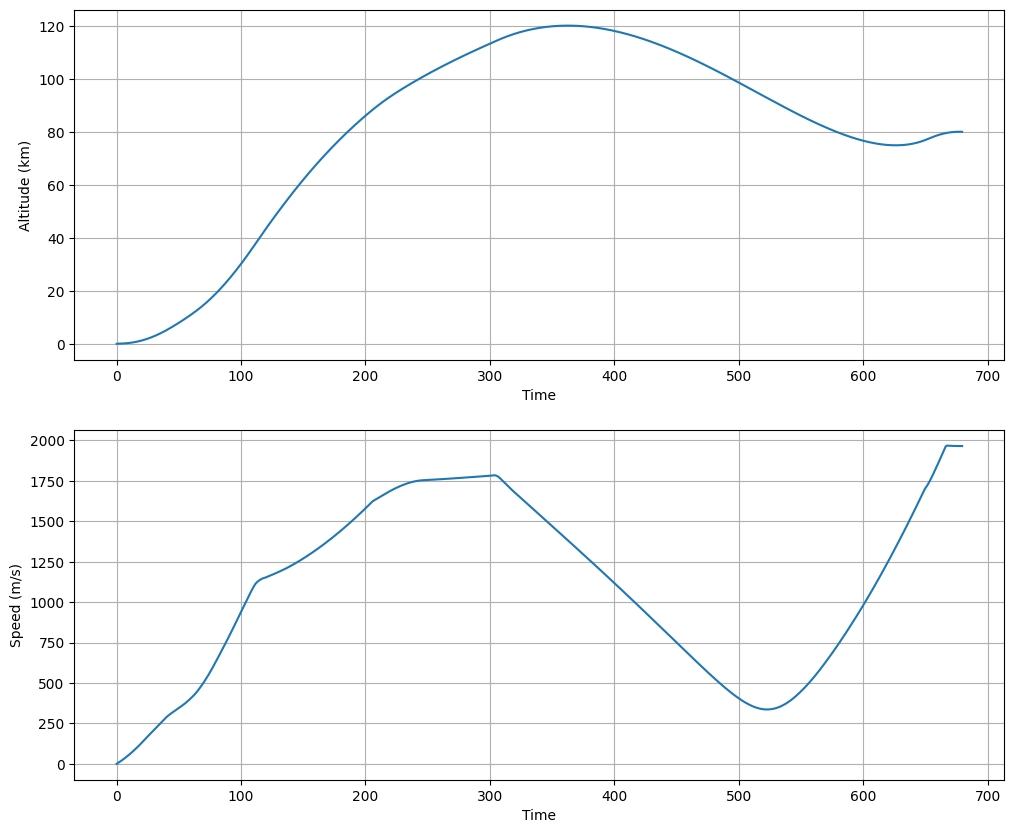

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

plt_ = ax[0]
plt_.plot(data['Time'], data['Altitude'])
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Altitude (km)')
plt_.grid()

plt_ = ax[1]
plt_.plot(data['Time'], data['Surfvel'])
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Speed (m/s)')
plt_.grid()




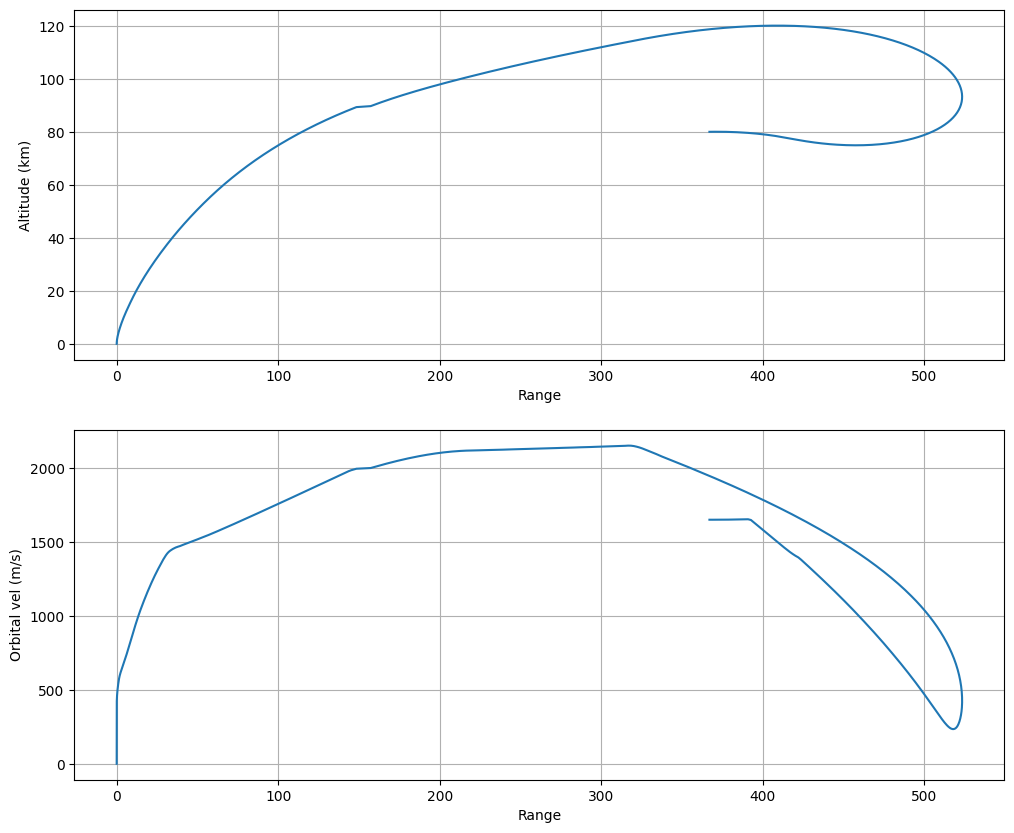

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

plt_ = ax[0]
plt_.plot(data['Dwnrg Dst'], data['Altitude'])
    
plt_.set_xlabel('Range')
plt_.set_ylabel('Altitude (km)')
plt_.grid()


plt_ = ax[1]
plt_.plot(data['Dwnrg Dst'], data['Orbvel'])
    
plt_.set_xlabel('Range')
plt_.set_ylabel('Orbital vel (m/s)')
plt_.grid()


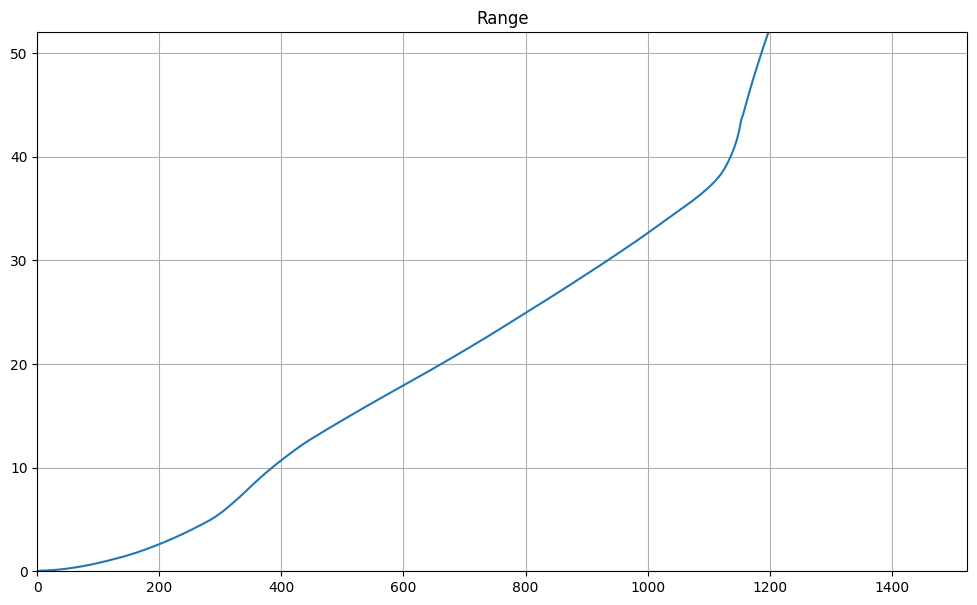

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

plt_ = ax
plt_.plot(data['Surfvel'], data['Altitude'])
    
plt_.set_xlim([0, 1524])
plt_.set_ylim([0, 52])
    
plt_.set_title('Range')
plt_.grid()

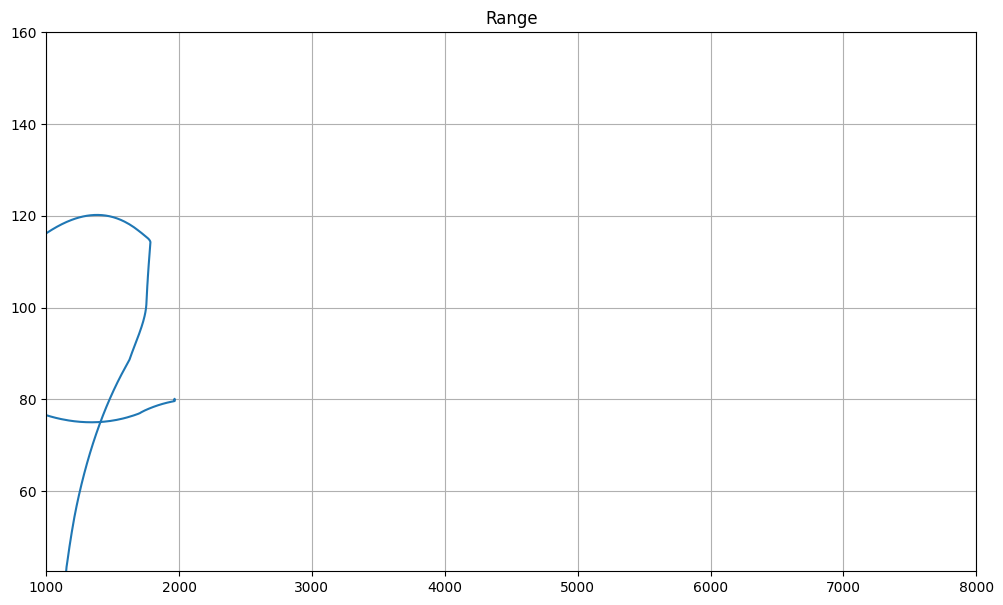

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

plt_ = ax
plt_.plot(data['Surfvel'], data['Altitude'])
    
plt_.set_xlim([1000, 8000])
plt_.set_ylim([42.5, 160])
    
plt_.set_title('Range')
plt_.grid()

In [15]:
traj_bounds= [[0, 500], [50, 350]]

def traj_disp(n, data):
    if n==1:
        traj_lines = [
            
                    np.array([
                     [ 54.5554432,  409.6       ],
                     [ 54.525952 ,  405.98588235],
                     [100.352    ,  397.49270588],
                     [124.928    ,  382.49411765],
                     [133.12     ,  375.26588235],
                     [161.792    ,  348.70211765],
                     [178.9952   ,  335.14917647],
                     [223.232    ,  301.17647059],
                     [247.808    ,  283.10588235],
                     [272.384    ,  266.84235294],
                     [296.96     ,  246.96470588],
                     [321.536    ,  228.89411765],
                     [346.112    ,  210.82352941],
                     [370.688    ,  192.75294118],
                     [395.264    ,  174.68235294],
                     [403.456    ,  156.61176471],
                     [419.84     ,  129.50588235]
                    ])
                ]


        r_speed = (0, 1524)
        r_alt = (0, 52)

        traj_data = data[(data['Surfvel'].between(*r_speed)) & (data['Altitude'].between(*r_alt))][['Surfvel', 'Altitude']]

        traj_speed = data['Surfvel'].to_numpy()
        traj_alt = data['Altitude'].to_numpy()

        traj_x = np.array([traj_x_convert(n, r) for r in traj_speed])
        traj_y = np.array([traj_y_convert(n, v) for v in traj_alt])

        trajplot_lines(n, traj_lines, [traj_x, traj_y], traj_bounds)


    elif n==2:
        traj_lines = [
                        np.array([
                             [ 59.00190476, 393.64155844],
                             [ 70.7047619 , 345.76623377],
                             [ 90.20952381, 297.89090909],
                             [109.71428571, 273.95324675],
                             [129.21904762, 255.60103896],
                             [187.73333333, 242.03636364],
                             [226.74285714, 242.03636364],
                             [265.75238095, 246.02597403],
                             [304.76190476, 250.01558442],
                             [343.77142857, 254.00519481],
                             [382.78095238, 254.00519481],
                             [421.79047619, 252.40935065],
                             [441.2952381 , 250.01558442],
                             [456.89904762, 247.62181818]
                                 ])
                ]

        r_speed = (1524, 8000)
        r_alt = (42, 160)

        traj_data = data[(data['Surfvel'].between(*r_speed)) & (data['Altitude'].between(*r_alt))][['Surfvel', 'Altitude']]

        traj_speed = data['Surfvel'].to_numpy()
        traj_alt = data['Altitude'].to_numpy()

        traj_x = np.array([traj_x_convert(n, r) for r in traj_speed])
        traj_y = np.array([traj_y_convert(n, v) for v in traj_alt])

        trajplot_lines(n, traj_lines, [traj_x, traj_y], traj_bounds)
        
    elif n==5:
        traj_lines = [
            np.array([
                 [333.36888889, 401.63555556],
                 [347.02222222, 353.84888889],
                 [369.77777778, 306.06222222],
                 [392.53333333, 278.18666667],
                 [415.28888889, 263.85066667],
                 [438.04444444, 256.68266667],
                 [460.8       , 250.31111111]
            ]),
            np.array([
                 [369.77777778, 210.48888889],
                 [347.02222222, 214.47111111],
                 [324.26666667, 226.41777778],
                 [301.51111111, 238.36444444],
                 [278.75555556, 250.31111111],
                 [233.24444444, 274.20444444]
                
            ]),
            np.array([
                 [315.16444444, 377.74222222],
                 [319.71555556, 318.00888889],
                 [327.45244444, 293.31911111],
                 [233.24444444, 316.416     ],
                 [187.73333333, 337.92      ],
                 [142.22222222, 329.95555556],
                 [119.46666667, 325.97333333],
                 [ 96.71111111, 319.60177778],
                 [ 67.12888889, 318.00888889],
                 [ 65.99111111, 317.21244444]
            
            ])
        ]
        

        r_speed = (-2133, 8000)
        r_alt = (42, 130)

        traj_data = data[(data['Dwnrg surfvel'].between(*r_speed)) & (data['Altitude'].between(*r_alt))][['Dwnrg surfvel', 'Altitude']]

        traj_speed = data['Dwnrg surfvel'].to_numpy()
        traj_alt = data['Altitude'].to_numpy()

        traj_x = np.array([traj_x_convert(n, r) for r in traj_speed])
        traj_y = np.array([traj_y_convert(n, v) for v in traj_alt])

        trajplot_lines(n, traj_lines, [traj_x, traj_y], traj_bounds)

    

def trajplot_lines(n, lines, data, traj_bounds):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

    plt_ = ax
    #plt_.invert_yaxis()
    
    
    img = plt.imread("ascent_traj" + str(n) + "_bg.png")
    plt_.imshow(img, aspect='auto', extent=[traj_bounds[0][0], traj_bounds[0][1], traj_bounds[1][0], traj_bounds[1][1]])
    
    
    #for l in lines:
    #    line_X = np.array([rescale_traj_x(p, traj_bounds[0]) for p in l[:,0]])  
    #    line_y = np.array([rescale_traj_y(p, traj_bounds[1]) for p in l[:,1]]) 
    #    plt_.plot(line_X, line_y, 'r')
    #   

   
        
    plt1 = plt_.scatter(
                        np.array([rescale_traj_x(p, traj_bounds[0]) for p in data[0]]),
                        np.array([rescale_traj_y(p, traj_bounds[1]) for p in data[1]]),
        )
    
    _ = plt_.scatter(
                    rescale_traj_x(traj_x_convert(n, -2500), traj_bounds[0]), 
                    rescale_traj_y(traj_y_convert(n, 80), traj_bounds[1])
    )
    
    _ = plt_.scatter(
                    rescale_traj_x(traj_x_convert(n, -1500), traj_bounds[0]), 
                    rescale_traj_y(traj_y_convert(n, 80), traj_bounds[1])
    )
    
    plt_.set_xlim(traj_bounds[0])
    plt_.set_ylim(traj_bounds[1])
     
    #plt_.grid()
        
        
def traj_x_convert(n, val):
    
    par = val  * 3.28084
    
    if n==1:
        return (par / 5000.0 * 0.8 + 0.1) * 512.0;
    elif n==2:
        return ((par - 5000.0) / 21000.0 * 0.8 + 0.1) * 512.0;
    elif n==5:
        return ((par + 8000.0)/18000. * 0.8 + 0.1) * 512.0;
        
            
def traj_y_convert(n, val):
    
    par = val  * 3280.84

    if n==1:
        return 512.0 - (par / 170000.0 * 0.6 + 0.2) * 512.0;return (-0.03728 * par + 966.857 + 32.7)
    elif n==2:
        return 512.0 - ((par - 140000.0) / 385000.0 * 0.6 + 0.2) * 512.0;
    elif n==5:
        return 512.0 - ((par - 150000)/450000. * 0.7 + 0.2) * 512.0;
    
#traj_bounds= [[0, 500], [50, 350]]
    
def rescale_traj_x(p, traj_bounds_x):
    out = (p - 430)/486*(traj_bounds_x[1] - traj_bounds_x[0]) + traj_bounds_x[0] 
    return p

def rescale_traj_y(p, traj_bounds_y):
    return (p - 425)/(-275)*(traj_bounds_y[1] - traj_bounds_y[0]) + traj_bounds_y[0]
    

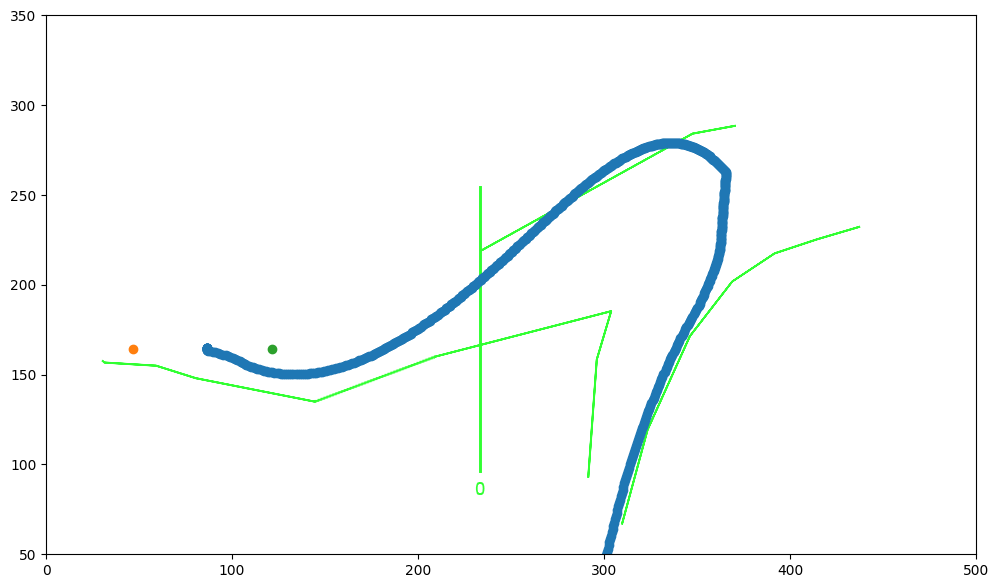

In [16]:
traj_disp(5, data)

In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
traj_lines = np.array([
    [4400, 160000.0],
    [5000, 220000.0],
    [6000, 280000.0],
    [7000, 315000.0],
    [8000, 333000.0],
    [9000, 342000.0],
    [10000, 350000.0]
])
        
traj_lines[:,0] = traj_x_convert(5, traj_lines[:,0])
traj_lines[:,1] = traj_y_convert(5, traj_lines[:,1])

print(traj_lines)

[[ 5.61736727e+02 -4.17552020e+05]
 [ 6.06531129e+02 -5.74332427e+05]
 [ 6.81188466e+02 -7.31112835e+05]
 [ 7.55845803e+02 -8.22568073e+05]
 [ 8.30503140e+02 -8.69602195e+05]
 [ 9.05160476e+02 -8.93119256e+05]
 [ 9.79817813e+02 -9.14023310e+05]]
